In [2]:
from mmdet.apis import init_detector, inference_detector, show_result_pyplot
import mmcv

In [3]:
config_file = '../configs/faster_rcnn/faster_rcnn_r50_fpn_1x_coco.py'
# download the checkpoint from model zoo and put it in `checkpoints/`
# url: http://download.openmmlab.com/mmdetection/v2.0/faster_rcnn/faster_rcnn_r50_fpn_1x_coco/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth
checkpoint_file = '../checkpoints/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth'

In [4]:
# build the model from a config file and a checkpoint file
model = init_detector(config_file, checkpoint_file, device='cuda:0')

Use load_from_local loader


In [5]:
# test a single image
img = 'demo.jpg'
result = inference_detector(model, img)

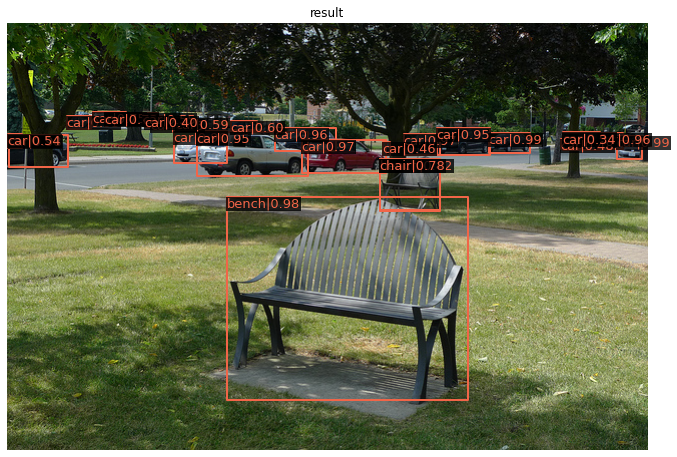

In [6]:
# show the results
show_result_pyplot(model, img, result)